### Temperature 2

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
df = pd.read_csv('Temperature2.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         60 non-null     int64  
 1   month        60 non-null     int64  
 2   Year-Month   60 non-null     object 
 3   Temperature  60 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 2.0+ KB


In [4]:
df['Year-Month'] = pd.to_datetime(df['Year-Month'],format ='%Y-%m')
df.head()

,year,month,Year-Month,Temperature
0,2015,1,2015-01-01,-0.2
1,2015,2,2015-02-01,1.2
2,2015,3,2015-03-01,4.6
3,2015,4,2015-04-01,9.9
4,2015,5,2015-05-01,15.1


In [5]:
df.set_index('Year-Month',inplace=True)

In [6]:
df.head()

,year,month,Temperature
Year-Month,,,
2015-01-01,2015,1,-0.2
2015-02-01,2015,2,1.2
2015-03-01,2015,3,4.6
2015-04-01,2015,4,9.9
2015-05-01,2015,5,15.1


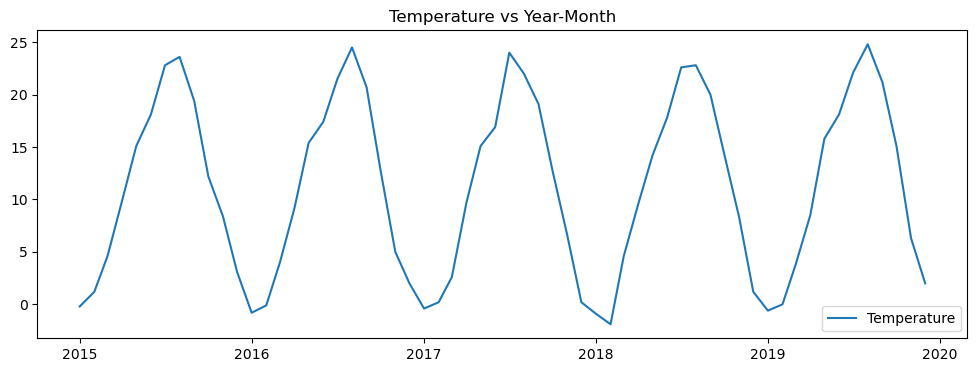

In [8]:
#Plotting the graph
plt.figure(figsize=(12,4))
plt.plot(df['Temperature'],label='Temperature')
plt.title('Temperature vs Year-Month')
plt.legend(loc='best')
plt.show(block=False)

### Exchange Rate Dataset-1

In [26]:
df = pd.read_csv('Exchange+Rate+1.csv')
df.head()

,Date,Exchange Rate
0,12-08-2019,0.8919
1,13-08-2019,0.8943
2,14-08-2019,0.8973
3,15-08-2019,0.9004
4,16-08-2019,0.9016


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           7 non-null      object 
 1   Exchange Rate  7 non-null      float64
dtypes: float64(1), object(1)
memory usage: 240.0+ bytes


In [28]:
df['Date'] = pd.to_datetime(df['Date'],format="%d-%m-%Y")
df.head()

,Date,Exchange Rate
0,2019-08-12,0.8919
1,2019-08-13,0.8943
2,2019-08-14,0.8973
3,2019-08-15,0.9004
4,2019-08-16,0.9016


In [29]:
df.set_index('Date',inplace=True)

In [31]:
df

,Exchange Rate
Date,
2019-08-12,0.8919
2019-08-13,0.8943
2019-08-14,0.8973
2019-08-15,0.9004
2019-08-16,0.9016
2019-08-19,0.9012
2019-08-20,0.9016


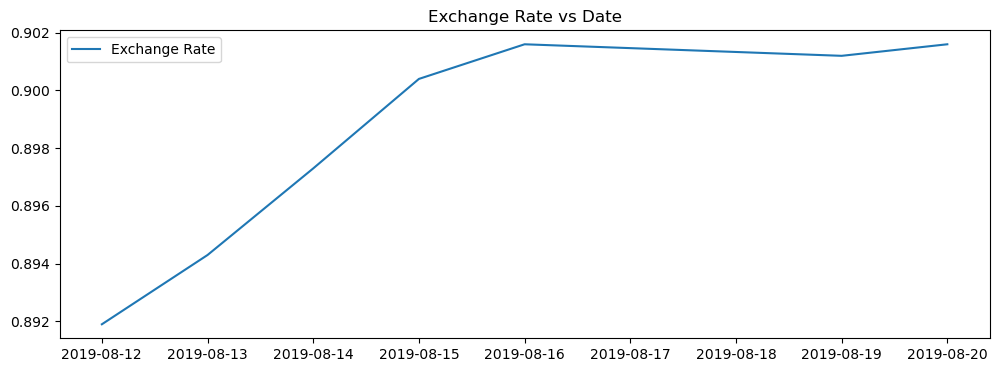

In [32]:
##Plotting the graph
plt.figure(figsize=(12,4))
plt.plot(df['Exchange Rate'],label='Exchange Rate')
plt.title('Exchange Rate vs Date')
plt.legend(loc='best')
plt.show(block=False)

In [16]:
train_len=5
train = df[:train_len]
test=df[train_len:]

In [17]:
df

,Exchange Rate
Date,
2019-08-12,0.8919
2019-08-13,0.8943
2019-08-14,0.8973
2019-08-15,0.9004
2019-08-16,0.9016
2019-08-19,0.9012
2019-08-20,0.9016


### Simple Moving Average

In [41]:
y_hat_sma = df.copy()
y_hat_sma['sma_forecast'] = df['Exchange Rate'].rolling(2).mean()
y_hat_sma['sma_forecast'][train_len:]  = y_hat_sma['sma_forecast'][train_len-1]

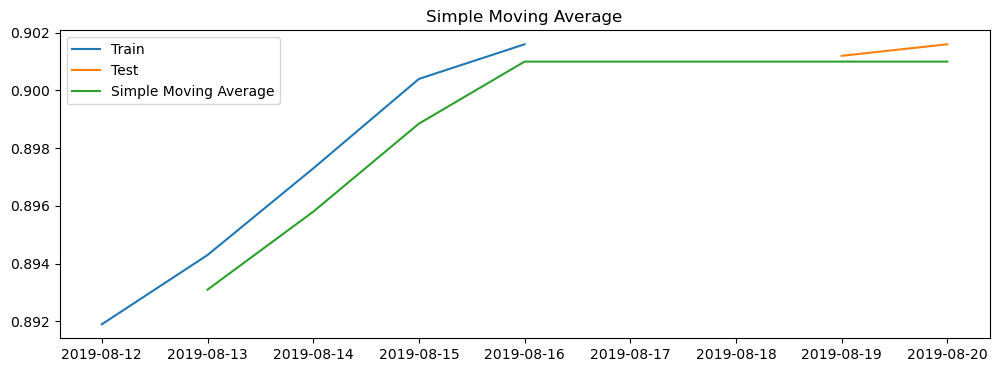

In [42]:
##Plot the train,test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Exchange Rate'],label='Train')
plt.plot(test['Exchange Rate'],label='Test')
plt.plot(y_hat_sma['sma_forecast'],label='Simple Moving Average')
plt.title('Simple Moving Average')
plt.legend(loc='best')
plt.show()

In [44]:
##rmse and mape
rmse = round(np.sqrt(mean_squared_error(test['Exchange Rate'],y_hat_sma['sma_forecast'][train_len:])),2)
mape =round( np.mean((np.abs(test['Exchange Rate']-y_hat_sma['sma_forecast'][train_len:]))/test['Exchange Rate']*100),2)
print('RMSE:',rmse)
print('MAPE:',mape)

RMSE: 0.0
MAPE: 0.04


### Naive Method

In [34]:
y_hat_naive = df.copy()
y_hat_naive['naive_forecast'] = train['Exchange Rate'][-1]
y_hat_naive['naive_forecast'] = y_hat_naive['naive_forecast'][train_len:]

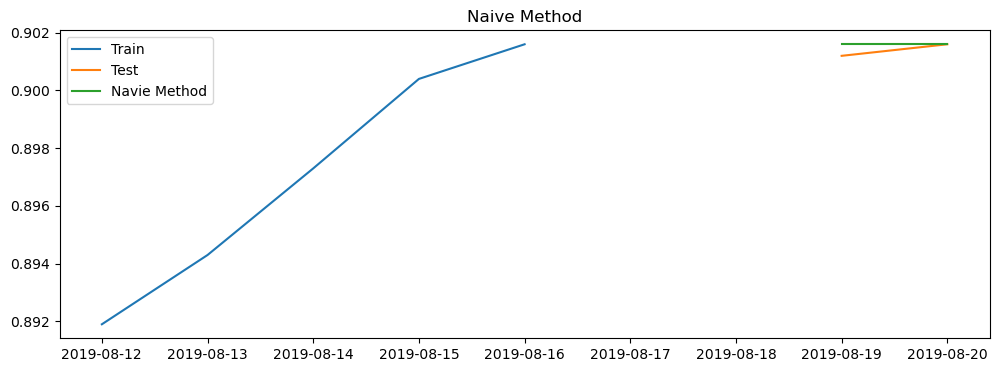

In [35]:
##Plot the train,test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Exchange Rate'],label='Train')
plt.plot(test['Exchange Rate'],label='Test')
plt.plot(y_hat_naive['naive_forecast'],label='Navie Method')
plt.title('Naive Method')
plt.legend(loc='best')
plt.show()

In [40]:
##rmse and mape value
from sklearn.metrics import mean_squared_error
rmse = round(np.sqrt(mean_squared_error(test['Exchange Rate'],y_hat_naive['naive_forecast'][train_len:])),2)
mape =round( np.mean((np.abs(test['Exchange Rate']-y_hat_naive['naive_forecast'][train_len:]))/test['Exchange Rate']*100),2)
print('RMSE:',rmse)
print('MAPE:',mape)

RMSE: 0.0
MAPE: 0.02


### Simple Average method 

In [45]:
y_hat_sa = df.copy()
y_hat_sa['sa_forecast'] = train['Exchange Rate'].mean()
y_hat_sa['sa_forecast'] = y_hat_sa['sa_forecast'][train_len:]

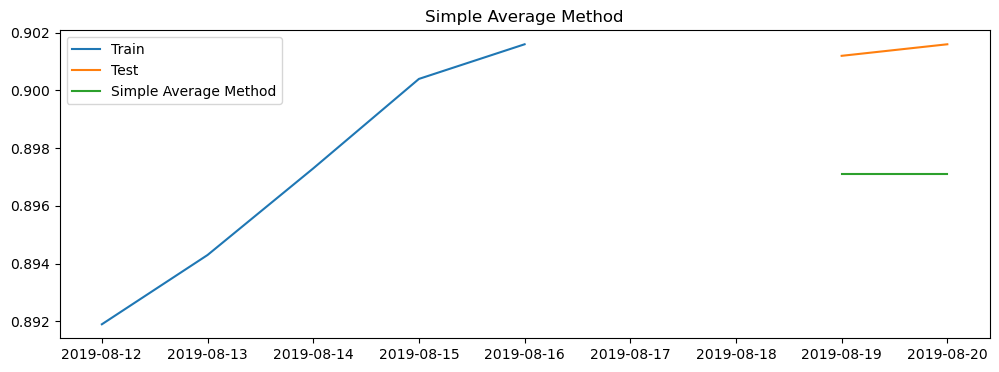

In [46]:
##Plot the train,test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Exchange Rate'],label='Train')
plt.plot(test['Exchange Rate'],label='Test')
plt.plot(y_hat_sa['sa_forecast'],label='Simple Average Method')
plt.title('Simple Average Method')
plt.legend(loc='best')
plt.show()

In [47]:
##rmse and mape value
from sklearn.metrics import mean_squared_error
rmse = round(np.sqrt(mean_squared_error(test['Exchange Rate'],y_hat_sa['sa_forecast'][train_len:])),2)
mape =round( np.mean((np.abs(test['Exchange Rate']-y_hat_sa['sa_forecast'][train_len:]))/test['Exchange Rate']*100),2)
print('RMSE:',rmse)
print('MAPE:',mape)

RMSE: 0.0
MAPE: 0.48


### Exchange Rate-2

In [48]:
df = pd.read_csv('Exchange+Rate+2.csv')
df.head()

,Date,Exchange Rate
0,01-03-2019,0.8790
1,04-03-2019,0.8828
2,05-03-2019,0.8850
3,06-03-2019,0.8834
4,07-03-2019,0.8917


In [49]:
df['Date'] = pd.to_datetime(df['Date'],format = '%d-%m-%Y')
df.head()

,Date,Exchange Rate
0,2019-03-01,0.8790
1,2019-03-04,0.8828
2,2019-03-05,0.8850
3,2019-03-06,0.8834
4,2019-03-07,0.8917


In [50]:
df.set_index('Date',inplace=True)

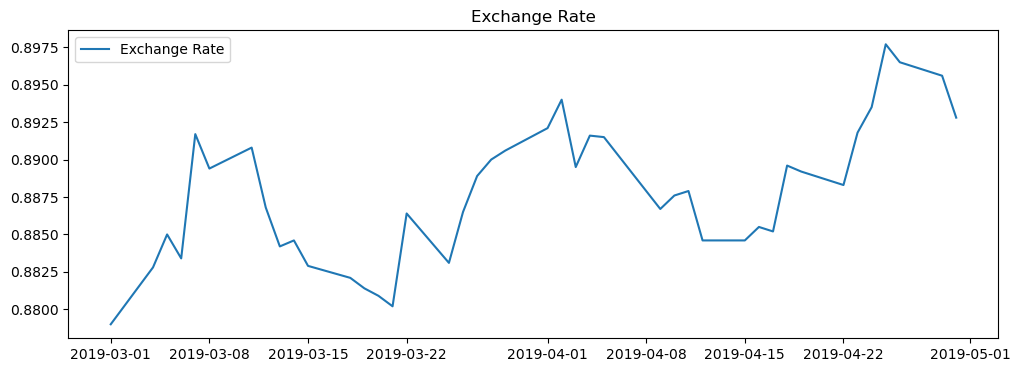

In [51]:
##Plot the graph
plt.figure(figsize=(12,4))
plt.plot(df['Exchange Rate'],label='Exchange Rate')
plt.title('Exchange Rate')
plt.legend(loc='best')
plt.show()